In [41]:
library("readr")
library("readxl")
library("ggplot2")
library("car")
library("foreign")
library(lattice)
library(gplots)
library(plm)
library(lmtest)
library(sandwich)

Warning message:
"il pacchetto 'sandwich' è stato creato con R versione 4.4.3"


In [10]:
Metrics_data <- read_excel("C:/Users/readytouse/Desktop/Magistrale/banking/project_3/metrics_dataset.xlsx")

In [11]:
head(Metrics_data)

DATE,MLF,DFR,MRO,NIM_SD,NIM_AVG,ILR_SD,ILR_AVG
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-01,0.25,-0.4,0,1.0036787,1.979761,15.13544,13.902389
2018-04-01,0.25,-0.4,0,0.8904494,1.728979,12.40869,9.358741
2018-07-01,0.25,-0.4,0,0.9584966,1.959342,12.98524,11.684826
2018-10-01,0.25,-0.4,0,0.9508749,1.889361,13.50979,11.648652
2019-01-01,0.25,-0.4,0,0.9829602,1.989840,12.33319,10.560945
2019-04-01,0.25,-0.4,0,0.9061479,1.712643,10.07801,7.038586


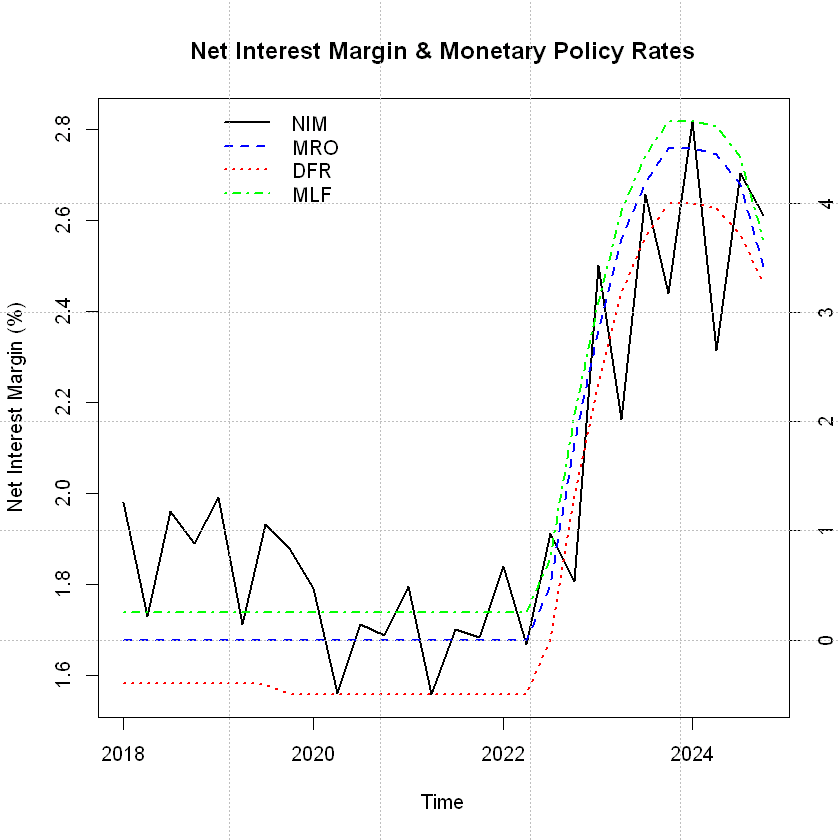

In [13]:
# Set up first plot: Total Volume on left y-axis
plot(Metrics_data$DATE, Metrics_data$NIM_AVG, type = "l", col = "black", lwd = 2,
     xlab = "Time", ylab = "Net Interest Margin (%)",
     ylim = range(Metrics_data$NIM_AVG, na.rm = TRUE),
     main = "Net Interest Margin & Monetary Policy Rates")

# Add second plot (rates) on right y-axis
par(new = TRUE)
rate_range <- range(c(Metrics_data$DFR, Metrics_data$MRO, Metrics_data$MLF), na.rm = TRUE)

plot(Metrics_data$DATE, Metrics_data$MRO, type = "n", axes = FALSE, xlab = "", ylab = "",
     ylim = rate_range)

# Add lines for rates
lines(Metrics_data$DATE, Metrics_data$MRO, col = "blue", lwd = 2, lty = 2)
lines(Metrics_data$DATE, Metrics_data$DFR, col = "red", lwd = 2, lty = 3)
lines(Metrics_data$DATE, Metrics_data$MLF, col = "green", lwd = 2, lty = 4)

# Add right y-axis
axis(side = 4)
mtext("Rates (%)", side = 4, line = 3)

# Optional: vertical line for event
abline(v = as.Date("2018-01-01"), col = "black", lty = 3, lwd = 2)

# Add legend

par(mar = c(5, 4, 4, 8), xpd = TRUE) 
legend("topleft",
       inset = c(0.15, 0),   # Push legend outside plot
       legend = c("NIM", "MRO", "DFR", "MLF"),
       col = c("black", "blue", "red", "green"),
       lty = c(1, 2, 3, 4),
       lwd = 2,
       xpd = TRUE,
       bty = "n")    

# Optional: grid
grid(col = "gray", lty = 3)

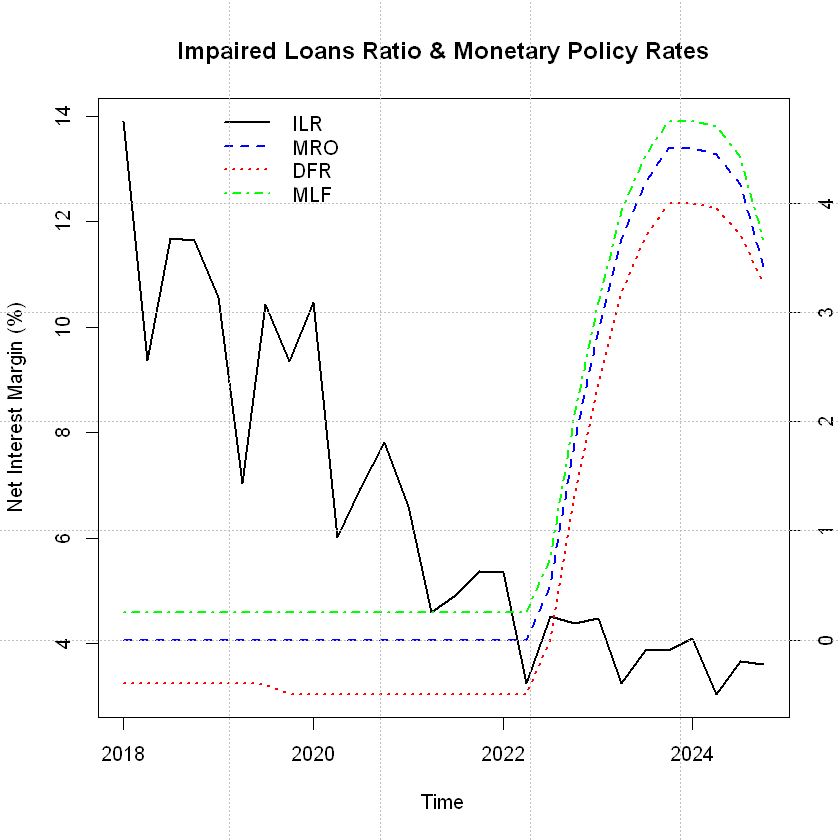

In [14]:
# Set up first plot: Total Volume on left y-axis
plot(Metrics_data$DATE, Metrics_data$ILR_AVG, type = "l", col = "black", lwd = 2,
     xlab = "Time", ylab = "Net Interest Margin (%)",
     ylim = range(Metrics_data$ILR_AVG, na.rm = TRUE),
     main = "Impaired Loans Ratio & Monetary Policy Rates")

# Add second plot (rates) on right y-axis
par(new = TRUE)
rate_range <- range(c(Metrics_data$DFR, Metrics_data$MRO, Metrics_data$MLF), na.rm = TRUE)

plot(Metrics_data$DATE, Metrics_data$MRO, type = "n", axes = FALSE, xlab = "", ylab = "",
     ylim = rate_range)

# Add lines for rates
lines(Metrics_data$DATE, Metrics_data$MRO, col = "blue", lwd = 2, lty = 2)
lines(Metrics_data$DATE, Metrics_data$DFR, col = "red", lwd = 2, lty = 3)
lines(Metrics_data$DATE, Metrics_data$MLF, col = "green", lwd = 2, lty = 4)

# Add right y-axis
axis(side = 4)
mtext("Rates (%)", side = 4, line = 3)

# Optional: vertical line for event
abline(v = as.Date("2018-01-01"), col = "black", lty = 3, lwd = 2)

# Add legend

par(mar = c(5, 4, 4, 8), xpd = TRUE) 
legend("topleft",
       inset = c(0.15, 0),   # Push legend outside plot
       legend = c("ILR", "MRO", "DFR", "MLF"),
       col = c("black", "blue", "red", "green"),
       lty = c(1, 2, 3, 4),
       lwd = 2,
       xpd = TRUE,
       bty = "n")    

# Optional: grid
grid(col = "gray", lty = 3)

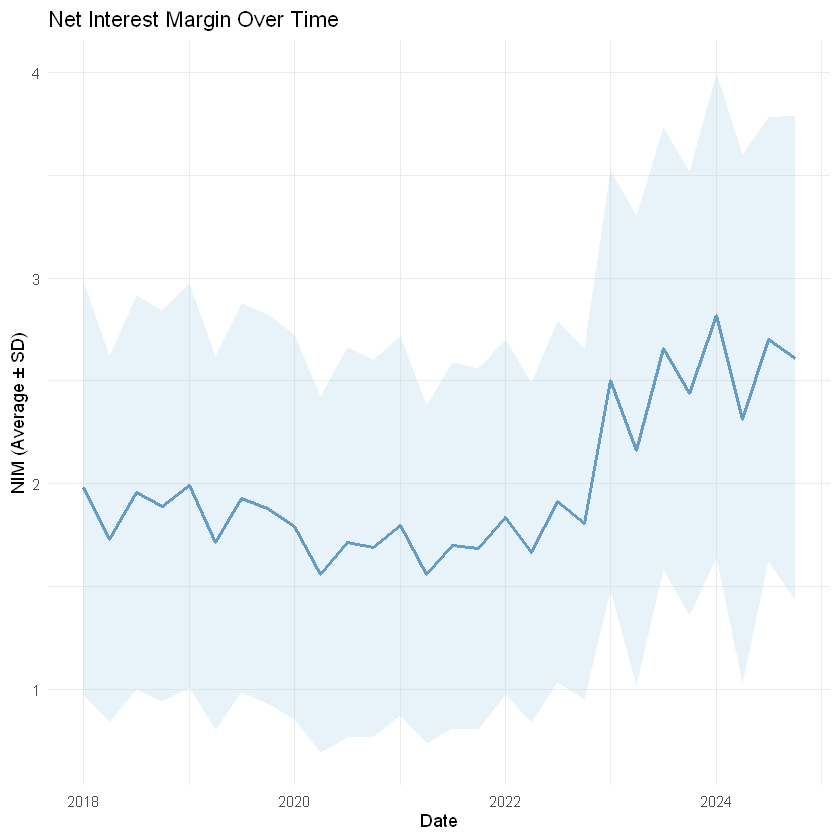

In [20]:
#lines plot 

ggplot(Metrics_data, aes(x = DATE, y = NIM_AVG)) +
  geom_line(color = "steelblue", size = 1) +
  geom_ribbon(aes(ymin = NIM_AVG - NIM_SD, ymax = NIM_AVG + NIM_SD),
              fill = "lightblue", alpha = 0.3) +
  labs(title = "Net Interest Margin Over Time",
       y = "NIM (Average ± SD)",
       x = "Date") +
  theme_minimal()


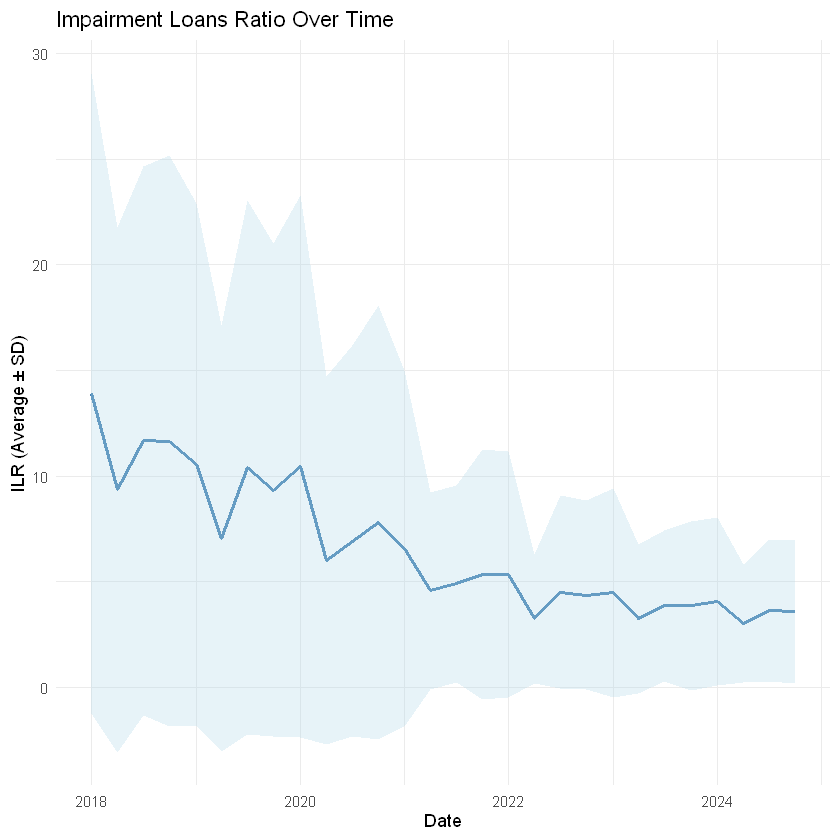

In [17]:
ggplot(Metrics_data, aes(x = DATE, y = ILR_AVG)) +
  geom_line(color = "steelblue", size = 1) +
  geom_ribbon(aes(ymin = ILR_AVG - ILR_SD, ymax = ILR_AVG + ILR_SD),
              fill = "lightblue", alpha = 0.3) +
  labs(title = "Impairment Loans Ratio Over Time",
       y = "ILR (Average ± SD)",
       x = "Date") +
  theme_minimal()

### ILR analysis

In [38]:
# test whether ILR depends on TIME

ts.ILR <- ts(Metrics_data$ILR_AVG)

lm.time.ILR <- lm(ts.ILR ~ time(ts.ILR) + I(time(ts.ILR)^2))
summary(lm.time.ILR)



Call:
lm(formula = ts.ILR ~ time(ts.ILR) + I(time(ts.ILR)^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6863 -0.5148  0.1664  0.4615  2.4747 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       13.436653   0.713748  18.825 2.80e-16 ***
time(ts.ILR)      -0.721935   0.113441  -6.364 1.16e-06 ***
I(time(ts.ILR)^2)  0.013075   0.003796   3.444  0.00203 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.17 on 25 degrees of freedom
Multiple R-squared:  0.8709,	Adjusted R-squared:  0.8606 
F-statistic: 84.32 on 2 and 25 DF,  p-value: 7.704e-12



t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)       13.4366535  0.9735724 13.8014 3.389e-13 ***
time(ts.ILR)      -0.7219348  0.1281776 -5.6323 7.331e-06 ***
I(time(ts.ILR)^2)  0.0130749  0.0038018  3.4392  0.002056 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


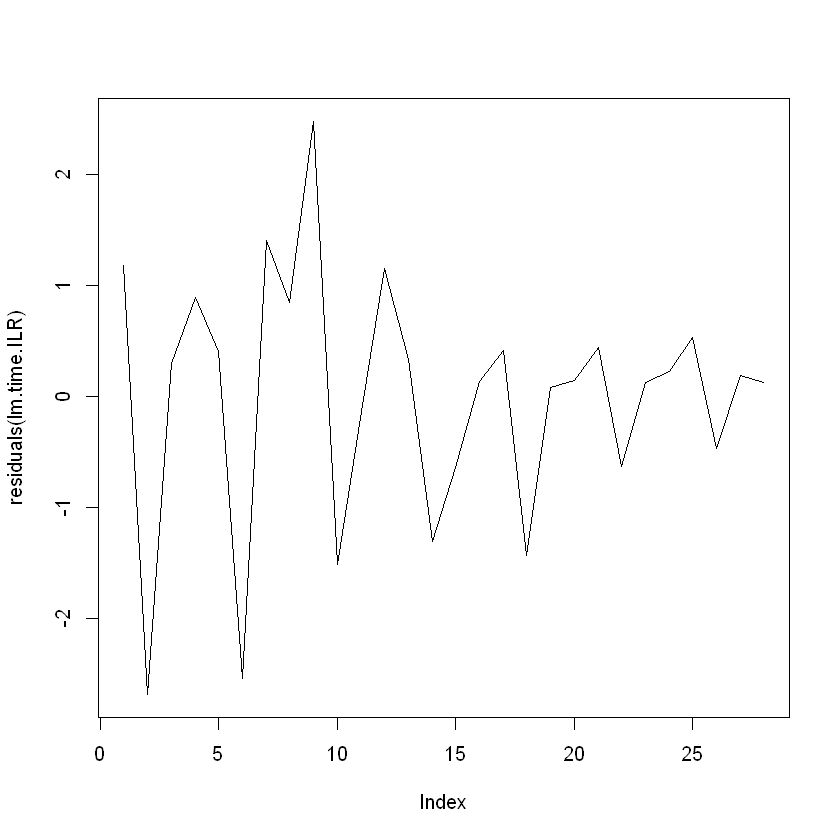

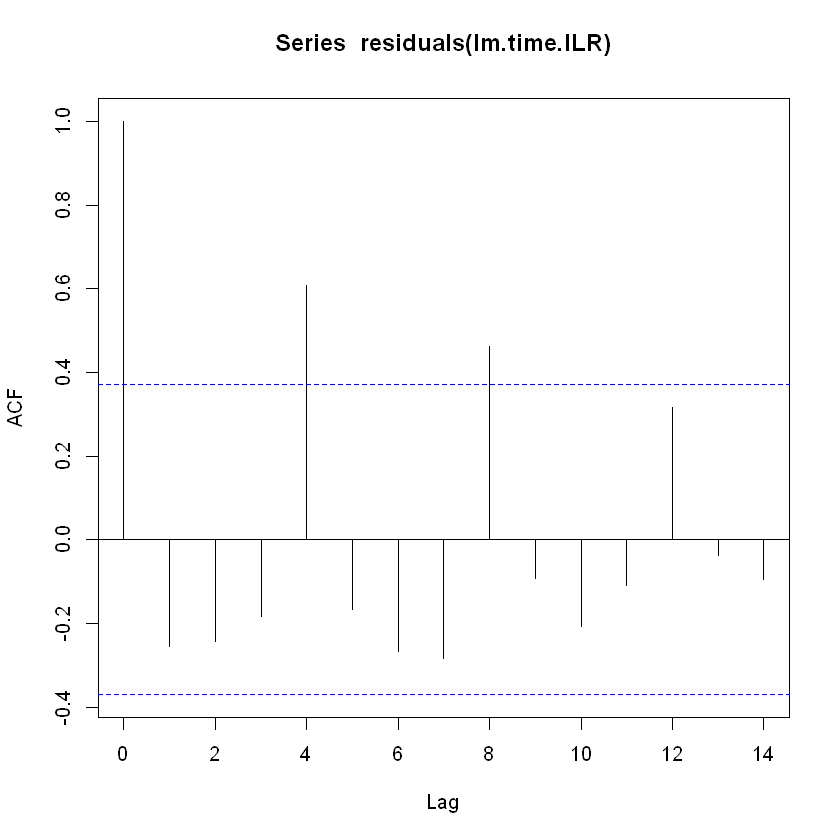

In [39]:
plot(residuals(lm.time.ILR), type = "l")
acf(residuals(lm.time.ILR))

In [42]:
# Get Newey-West robust standard errors HAC -> heterosk and autocorell robust SE

coeftest(lm.time.ILR, vcov = NeweyWest(lm.time.ILR, lag = 4, prewhite = FALSE))


t test of coefficients:

                    Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)       13.4366535  0.4601865  29.1983 < 2.2e-16 ***
time(ts.ILR)      -0.7219348  0.0646063 -11.1744 3.259e-11 ***
I(time(ts.ILR)^2)  0.0130749  0.0020035   6.5259 7.778e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Don't know how to automatically pick scale for object of type <ts>. Defaulting to continuous.


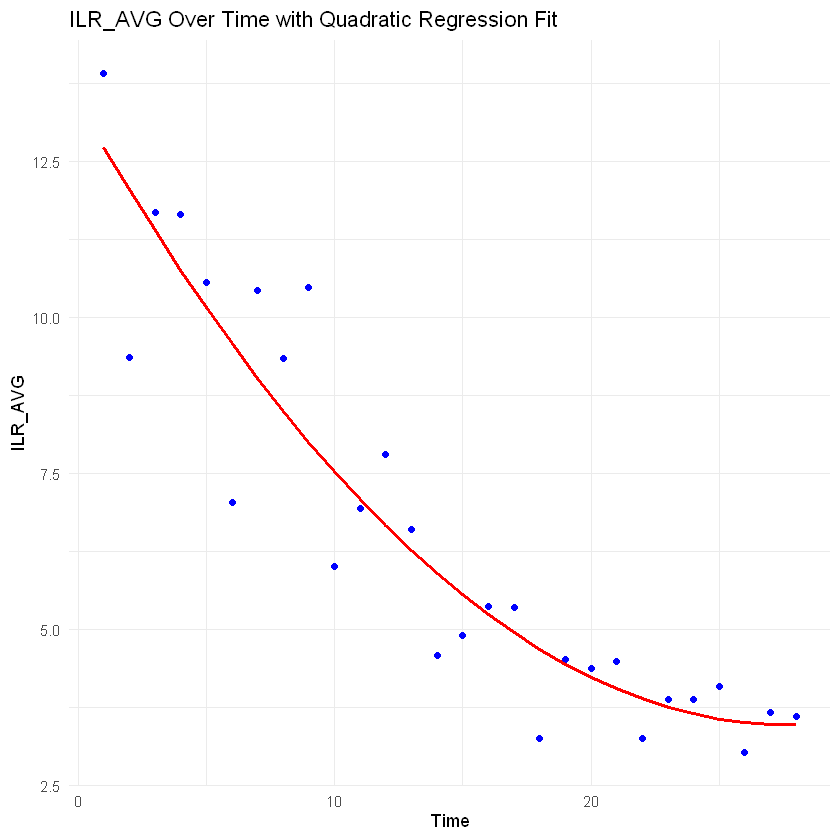

In [49]:
library(ggplot2)

# Create data frame
df <- data.frame(
  Time = time(ts.ILR),
  ILR_AVG = as.numeric(ts.ILR)
)

# Fit model and get fitted values
df$Fitted <- fitted(lm(ILR_AVG ~ Time + I(Time^2), data = df))

# Plot
ggplot(df, aes(x = Time, y = ILR_AVG)) +
  geom_point(color = "blue") +
  geom_line(aes(y = Fitted), color = "red", size = 1) +
  labs(title = "ILR_AVG Over Time with Quadratic Regression Fit",
       x = "Time", y = "ILR_AVG") +
  theme_minimal()

### NIM analysis

In [44]:
lm.NIM <- lm(NIM_AVG ~ MRO, data = Metrics_data)
summary(lm.NIM)


Call:
lm(formula = NIM_AVG ~ MRO, data = Metrics_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30010 -0.09855  0.01442  0.15562  0.22068 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.77827    0.03897   45.63  < 2e-16 ***
MRO          0.18179    0.01795   10.13 1.63e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1709 on 26 degrees of freedom
Multiple R-squared:  0.7977,	Adjusted R-squared:   0.79 
F-statistic: 102.6 on 1 and 26 DF,  p-value: 1.629e-10


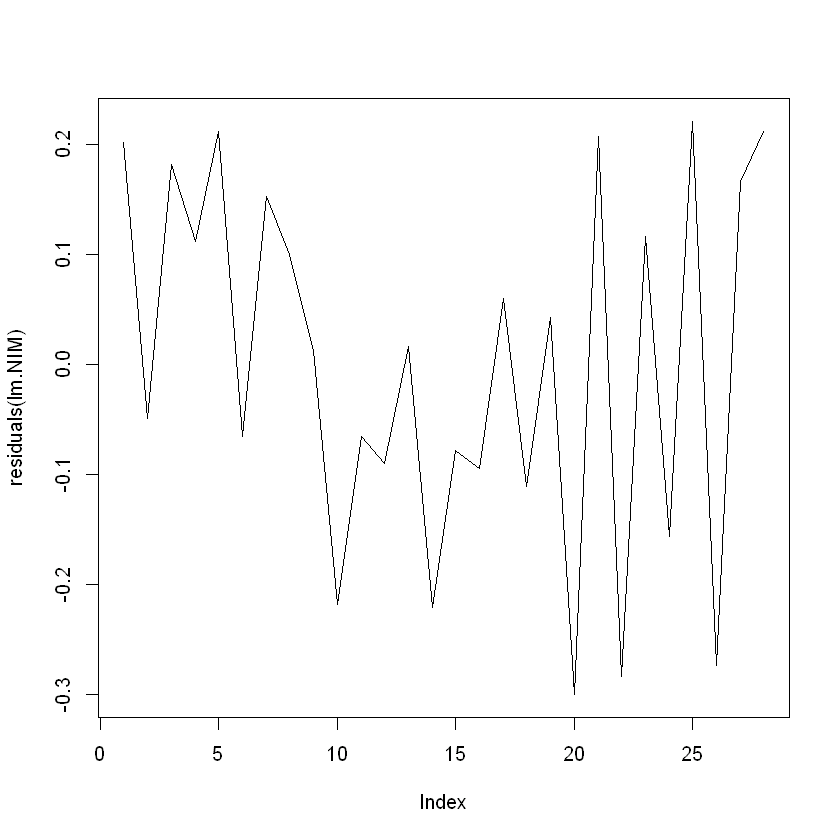

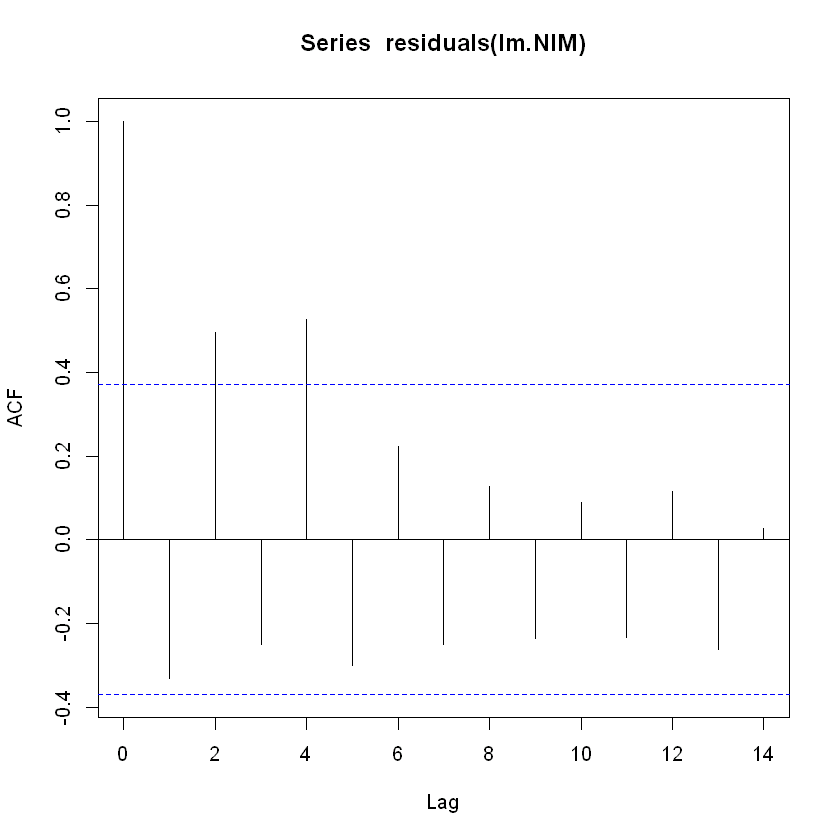

In [46]:
plot(residuals(lm.NIM), type ="l")
acf(residuals(lm.NIM))

In [47]:
coeftest(lm.NIM, vcov = NeweyWest(lm.NIM, lag = 4, prewhite = FALSE))


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 1.778268   0.041298  43.059 < 2.2e-16 ***
MRO         0.181789   0.014111  12.883 8.554e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


`geom_smooth()` using formula = 'y ~ x'


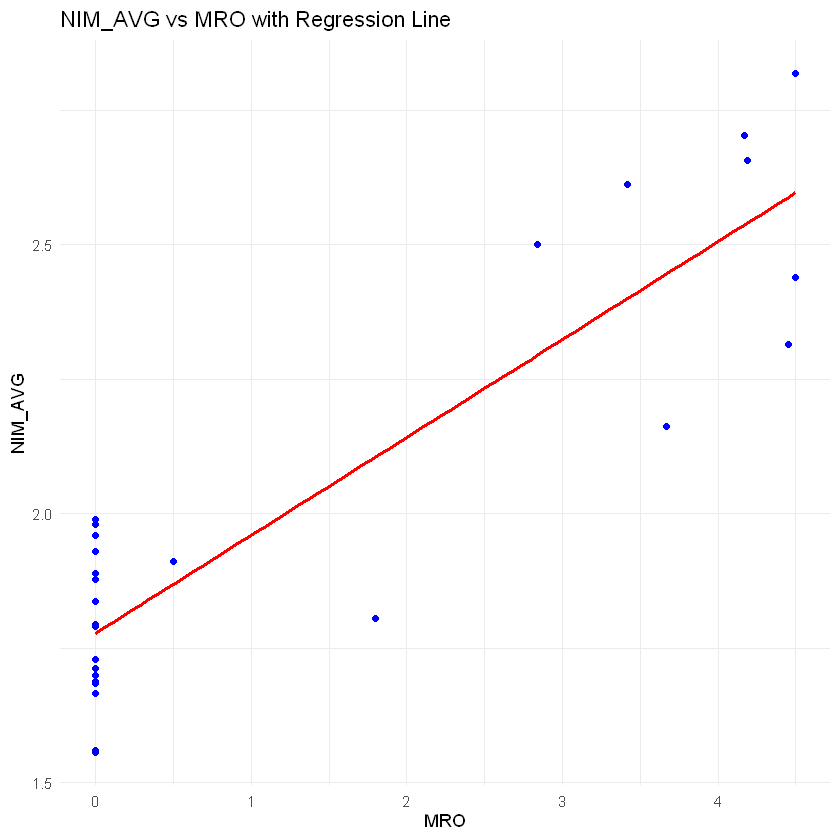

In [48]:
ggplot(Metrics_data, aes(x = MRO, y = NIM_AVG)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "NIM_AVG vs MRO with Regression Line",
       x = "MRO", y = "NIM_AVG") +
  theme_minimal()